# Práctica 3: Voting Classifiers

Inteligencia de Datos

Universidad Iberoamericana Ciudad de México

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.

En esta práctica vamos a crear el código para implementar y entrenar un voting classifier en scikit-learn con tres modelos: distintas versiones de una Máquina de Vectores de Soporte.

Comenzamos importando las librerías necesarias para el entrenamiento del modelo.

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

En esta ocasión, vamos a definir funciones para la creación de la mayoria de los componentes del modelo. Primero, definimos la función para crear los datos a clasificar usando la función `make_moons()`:

In [2]:
def get_dataset():
	X, y = make_moons(n_samples=1000, noise = 0.2, random_state=52)
	return X, y

Después, definimos los modelos base del ensamble. Dado que vamos a usar voto suave para definir la clase final que predice el ensamble, debemos tener cuidado que los modelos regresen probabilidades y no la clase (que sería útil si fuera voto duro). Con este fin, en la clase `SVC` con un kernel polinomial especificamos el parámetro `probability` como verdadero. Para definir el ensamble, solo necesitamos pasar como argumentos los modelos que forman el ensamble (en este caso la lista `models`) y especificar el tipo de voto, en este caso, `soft`.

In [3]:
def get_voting():
	# modelos base del ensamble
	models = []
	models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
	models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
	models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
	models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
	models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
	# ensabmle con voto suave
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble

En la siguiente función, creamos un diccionario con los modelos

In [4]:
def get_models():
	models = {}
	models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
	models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
	models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
	models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
	models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
	models['soft_voting'] = get_voting()
	return models

Ahora creamos una pequeña función para evaluar el modelo. En esta ocasión vamos a usar validación cruzada estratificada con 10 pliegues y 3 repeticiones. Como medida de evaluación consideramos `accuracy`.

In [5]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy',
	                         cv=cv, n_jobs=-1, error_score='raise')
	return scores

Juntamos todo lo anterior para crear el clasificador:

>svm1 0.860 (0.031)
>svm2 0.745 (0.037)
>svm3 0.899 (0.031)
>svm4 0.739 (0.036)
>svm5 0.858 (0.060)
>soft_voting 0.885 (0.037)


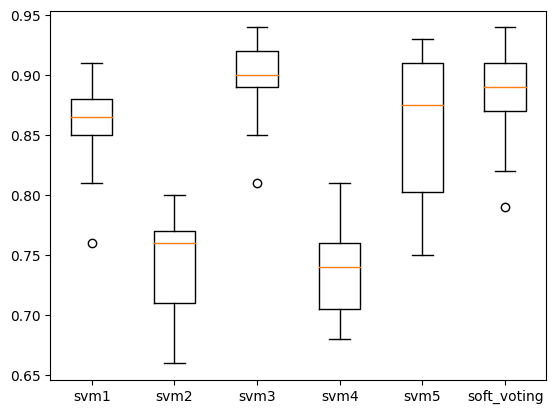

In [6]:
# creamos los datos
X, y = get_dataset()
# crear y obtener los modelos
models = get_models()
# evaluar los modelos y guardarlos en un contenedor
results, names = [], []
# para cada modelo --> evaluarlo y guardar resultados y nombre
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# graficamos el rendimiento de los modelos
plt.boxplot(results, labels=names, showmeans=False)
plt.show()

## Ejercicios

1. Buscar la documentación de la clase `VotingClassifier` en scikit-learn y hacer un resumen de los primeros cuatro parámetros que admite.

2. Modificar el código anterior para que el ensamble considere voto duro en lugar de suave. Consideren que también deben modificar la `SVC` para que no arroje probabilidades como predicciones en lugar de las clases.

3. En lugar de considerar el mismo modelo, crear un ensamble de una `SVC` con kernel lineal y `C=10`, un árbol de decisión con `max_depth=4`, un modelo de KNN con 7 vecinos, todo con voto suave. Agregar lo anterior al siguiente código:

In [ ]:
from itertools import product

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
clf1 = # aqui su arbol
clf2 = # aqui el KNN
clf3 = # aqui la SVC

# aqui definan su ensamble votante
eclf =

In [ ]:
# aqui entrenen sus modelos

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()